## a

In [1]:
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt

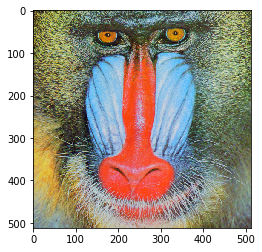

In [2]:
# original large image
A = imread('mandrill-large.tiff')
plt.imshow(A)

In [3]:
# shape of image A
A.shape

(512, 512, 3)

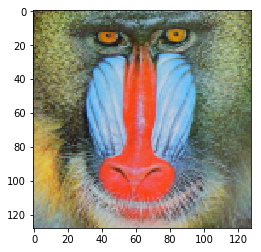

In [4]:
# original small image
B = imread('mandrill-small.tiff')
plt.imshow(B)

In [5]:
B.shape

(128, 128, 3)

## b 

In [6]:
# run k-means on image B to get centroids
img = B.reshape(-1,3) 
num_clusters = 16

In [7]:
# define k-means function
def kmeans(img, num_clusters=16):
    img = img.astype(np.float32)
    # initialize centroids as original pixels
    idx = np.random.choice(np.arange(img.shape[0]),size=num_clusters)
    centroids = img[idx]
    # repeat until convergence
    loss_history = []
    loss = 10
    while loss>1e-4:
        # assign
        dists = []
        for c in centroids:
            ds = np.sqrt(np.sum((img-c)**2, axis=1))
            dists.append(ds)
        assign = np.stack(dists).argmin(axis=0)
        # update centorid
        new = []
        for k in range(num_clusters):
            new.append(img[np.where(assign==k)[0]].mean(axis=0))
        new_centrodis = np.stack(new) #change to array
        # compute loss and reserve it
        loss = np.linalg.norm(np.abs(new_centrodis-centroids))
        loss_history.append(loss)
        centroids = new_centrodis
    return centroids, assign, loss_history


Text(0, 0.5, 'loss')

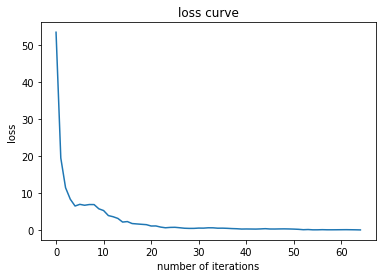

In [8]:
centroids, assign, loss_history = kmeans(img)
plt.plot(loss_history)
plt.title('loss curve')
plt.xlabel('number of iterations')
plt.ylabel('loss')

## c 

In [9]:
#replace A's pixel with nearest centroids
imgA = A.reshape(-1,3)
imgA = imgA.astype(np.float32)
dists = []
for c in centroids:
    ds = np.sqrt(np.sum((imgA-c)**2,axis=1))
    dists.append(ds)
assign = np.stack(dists).argmin(axis=0)

In [10]:
compressedImgA = np.zeros_like(imgA)
for k in range(num_clusters):
    idx = np.where(assign==k)
    compressedImgA[idx]=centroids[k] # modify this can result in segmentation
compressedImgA = compressedImgA.astype(np.uint8)

Text(0.5, 1.0, 'compressed A')

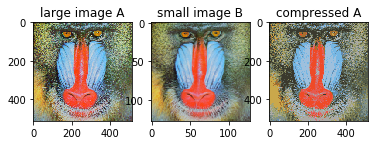

In [11]:
#  compare original images and compressed image
plt.subplot(131)
plt.imshow(A);plt.title('large image A')
plt.subplot(132)
plt.imshow(B);plt.title('small image B')
plt.subplot(133)
plt.imshow(compressedImgA.reshape(A.shape[0],A.shape[1],A.shape[2]));
plt.title('compressed A')